# Преступность в Бостоне

В данной работе будет подробно разобран датасет в котором содержится информация о приступлених сделанных в бостоне, записанных начиная с 15 июня 2015 года по 3 сентября 2018 года. Это набор данных, содержащий записи из новой системы отчетов о преступлениях, которая включает сокращенный набор полей, ориентированных на регистрацию типа инцидента, а также времени и места его возникновения.

## Импорт и предобработка
Для начала импортируем данные и предобработаем их

In [1]:
import pandas as pd

В стартовом сете есть два `csv` файла. Загрузи их как объект датафрейм и назовем соответствующе.

In [2]:
crime_df = pd.read_csv("data/crime.csv",  encoding= "unicode_escape")
offense_codes_df = pd.read_csv("data/offense_codes.csv",  encoding= "unicode_escape")

In [3]:
crime_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [5]:
offense_codes_df

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION
...,...,...
571,1806,DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS
572,1807,DRUGS - CLASS D TRAFFICKING OVER 50 GRAMS
573,1610,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS
574,2010,HOME INVASION


In [6]:
offense_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CODE    576 non-null    int64 
 1   NAME    576 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.1+ KB


#### Удаление ненужных столбцов
Сразу можно сказать то, что предсказывать мы будем вид преступления. Из этого следует сделать вывод, что целевой переменной у нас будет столбец `offense_code`. Тогда определим какие столбцы не влияют на нашу целевую переменную и удалим их.

In [7]:
crime_df = crime_df.drop(columns=["INCIDENT_NUMBER", "OFFENSE_CODE_GROUP", "OFFENSE_DESCRIPTION", "OCCURRED_ON_DATE", "Location"], axis=1)

In [8]:
crime_df.head()

,OFFENSE_CODE,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long
0,619,D14,808,NaN,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371
1,1402,C11,347,NaN,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300
2,3410,D4,151,NaN,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429
3,3114,D4,272,NaN,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664
4,3114,B3,421,NaN,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361


In [9]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   OFFENSE_CODE    319073 non-null  int64  
 1   DISTRICT        317308 non-null  object 
 2   REPORTING_AREA  319073 non-null  object 
 3   SHOOTING        1019 non-null    object 
 4   YEAR            319073 non-null  int64  
 5   MONTH           319073 non-null  int64  
 6   DAY_OF_WEEK     319073 non-null  object 
 7   HOUR            319073 non-null  int64  
 8   UCR_PART        318983 non-null  object 
 9   STREET          308202 non-null  object 
 10  Lat             299074 non-null  float64
 11  Long            299074 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 29.2+ MB


#### Работа со значениями `NaN`

Первый столбец который привлекает внимание это `SHOOTING`, посмотрим какие значения содержатся в нем не `NaN`

In [10]:
crime_df["SHOOTING"].value_counts()

Y    1019
Name: SHOOTING, dtype: int64

Как видно целесообразно заполнить пустые значения значением `N` и затем разбить это на `1` и `0`.

In [11]:
crime_df["SHOOTING"] = crime_df["SHOOTING"].fillna("N")

In [12]:
crime_df["SHOOTING"].value_counts()

N    318054
Y      1019
Name: SHOOTING, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder # импортируем необходимый для этого модуль
le = LabelEncoder() # создадим экземпляп
crime_df["SHOOTING"] = le.fit_transform(crime_df["SHOOTING"])

In [14]:
crime_df["SHOOTING"].value_counts()

0    318054
1      1019
Name: SHOOTING, dtype: int64

Как видим у нас получилось. Далее же заполним пустые значения в других столюцах.

In [15]:
# fillna() - заполнение заданным значением
crime_df["DISTRICT"] = crime_df["DISTRICT"].fillna("A0")
crime_df["UCR_PART"] = crime_df["UCR_PART"].fillna("Other")
crime_df["STREET"] = crime_df["STREET"].fillna("undefined")
crime_df["Lat"] = crime_df["Lat"].fillna(crime_df["Lat"].median())
crime_df["Long"] = crime_df["Long"].fillna(crime_df["Long"].median())

In [16]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   OFFENSE_CODE    319073 non-null  int64  
 1   DISTRICT        319073 non-null  object 
 2   REPORTING_AREA  319073 non-null  object 
 3   SHOOTING        319073 non-null  int32  
 4   YEAR            319073 non-null  int64  
 5   MONTH           319073 non-null  int64  
 6   DAY_OF_WEEK     319073 non-null  object 
 7   HOUR            319073 non-null  int64  
 8   UCR_PART        319073 non-null  object 
 9   STREET          319073 non-null  object 
 10  Lat             319073 non-null  float64
 11  Long            319073 non-null  float64
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 28.0+ MB


Далее когда все пустые значения откорректированны небходимо привести столбцы типа `object` к целочисленному типу. С помощью `LabelEncoder` присвоем код к значению в столбцах.

In [18]:
# работа с ранее созданным экземпляром класса le
crime_df["DISTRICT"] = le.fit_transform(crime_df["DISTRICT"])
crime_df["REPORTING_AREA"] = le.fit_transform(crime_df["REPORTING_AREA"])
crime_df["DAY_OF_WEEK"] = le.fit_transform(crime_df["DAY_OF_WEEK"])
crime_df["UCR_PART"] = le.fit_transform(crime_df["UCR_PART"])
crime_df["STREET"] = le.fit_transform(crime_df["STREET"])

In [19]:
crime_df.head()

,OFFENSE_CODE,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long
0,619,8,784,0,2018,9,3,13,1,2535,42.357791,-71.139371
1,1402,6,275,0,2018,8,5,0,3,2073,42.306821,-71.060300
2,3410,9,60,0,2018,9,1,19,2,784,42.346589,-71.072429
3,3114,9,192,0,2018,9,1,21,2,3065,42.334182,-71.078664
4,3114,5,357,0,2018,9,1,21,2,1240,42.275365,-71.090361


In [20]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   OFFENSE_CODE    319073 non-null  int64  
 1   DISTRICT        319073 non-null  int32  
 2   REPORTING_AREA  319073 non-null  int32  
 3   SHOOTING        319073 non-null  int32  
 4   YEAR            319073 non-null  int64  
 5   MONTH           319073 non-null  int64  
 6   DAY_OF_WEEK     319073 non-null  int32  
 7   HOUR            319073 non-null  int64  
 8   UCR_PART        319073 non-null  int32  
 9   STREET          319073 non-null  int32  
 10  Lat             319073 non-null  float64
 11  Long            319073 non-null  float64
dtypes: float64(2), int32(6), int64(4)
memory usage: 21.9 MB


Сделаем небольшие корректировки с целочисленным типом и приведем `int32` к `int64`.

In [32]:
# Еще откорректируем столбец. Из за того что он содержит просто строки с пробелом при конвертации из int32 в int64 
# будет ошибка
crime_df["REPORTING_AREA"] = crime_df["REPORTING_AREA"].replace(to_replace=' ', value= None)
crime_df["REPORTING_AREA"] = crime_df["REPORTING_AREA"].fillna(crime_df["REPORTING_AREA"].median())

In [28]:
crime_df["REPORTING_AREA"].value_counts()

0      20250
16      2372
98      2016
255     1878
22      1832
       ...  
626       12
629       11
714        7
103        5
863        1
Name: REPORTING_AREA, Length: 879, dtype: int64

In [35]:
# и далее приступим к конвертации
crime_df["DISTRICT"] = crime_df["DISTRICT"].astype("int64")
crime_df["REPORTING_AREA"] = crime_df["REPORTING_AREA"].astype("int64")
crime_df["SHOOTING"] = crime_df["SHOOTING"].astype("int64")
crime_df["DAY_OF_WEEK"] = crime_df["DAY_OF_WEEK"].astype("int64")
crime_df["UCR_PART"] = crime_df["UCR_PART"].astype("int64")
crime_df["STREET"] = crime_df["STREET"].astype("int64")


In [36]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   OFFENSE_CODE    319073 non-null  int64  
 1   DISTRICT        319073 non-null  int64  
 2   REPORTING_AREA  319073 non-null  int64  
 3   SHOOTING        319073 non-null  int64  
 4   YEAR            319073 non-null  int64  
 5   MONTH           319073 non-null  int64  
 6   DAY_OF_WEEK     319073 non-null  int64  
 7   HOUR            319073 non-null  int64  
 8   UCR_PART        319073 non-null  int64  
 9   STREET          319073 non-null  int64  
 10  Lat             319073 non-null  float64
 11  Long            319073 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 29.2 MB


### Вывод по предобработке
В данной подчати были импортированны данные, а так же была произведена работа по их предобрабтке. Именно:
- Удаление ненужных столбцов
- Заполнение значений `NaN`
- Все типы столбцов приведены к соответствующему типу

## Визуализация данных

Для начала импортируем необходимые данные для работы с графиками.

In [37]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#### Корреляционая карта
Просмотрим с помощью корреляционнй карты взаимодествие наших признаков.

<AxesSubplot:>

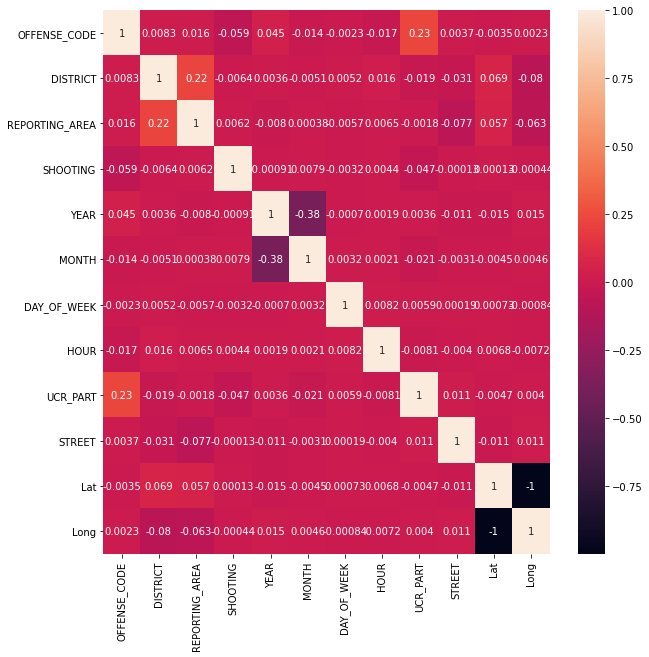

In [39]:
plt.figure(figsize = (10, 10))
sns.heatmap(crime_df.corr(), annot = True)

#### Ящик с усами
Чтобы просмотреть, что то вроде описания выведем ящик с усами. 

<AxesSubplot:>

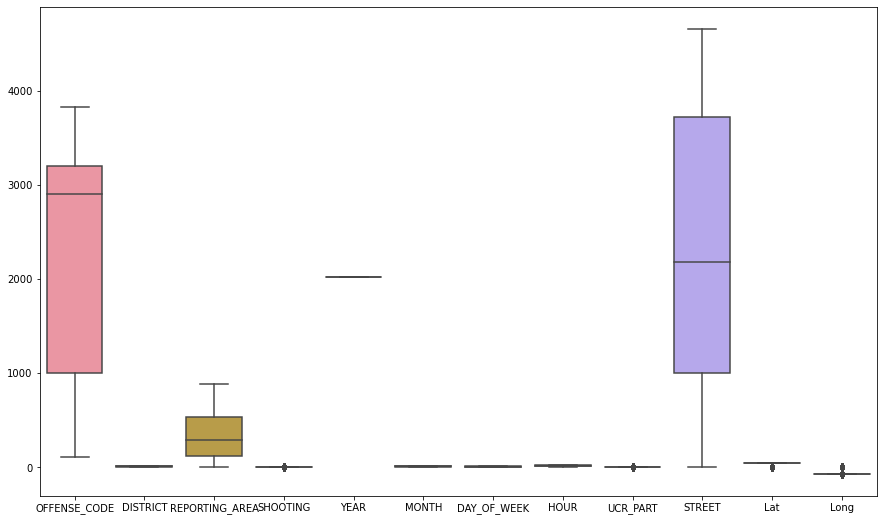

In [47]:
plt.figure(figsize = (15, 9))
sns.boxplot(data=crime_df)

#### CountPlot
Далее так же мы можем просмотреть частоту преступлений по годам

C:\Users\mugen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YEAR', ylabel='count'>

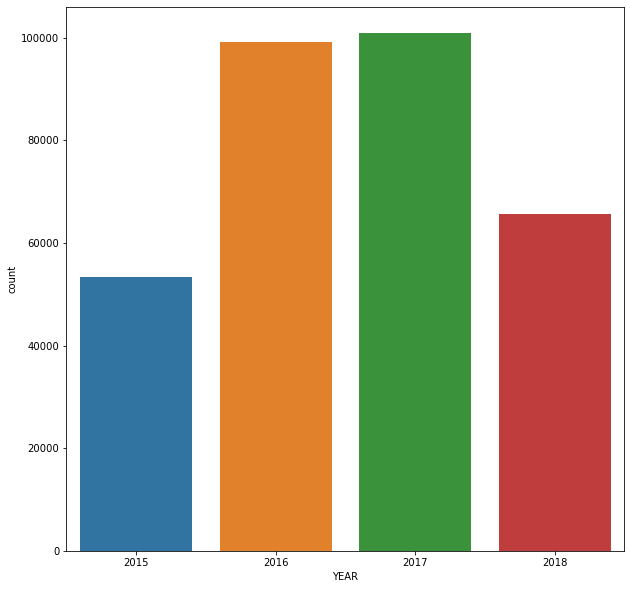

In [54]:
plt.figure(figsize=(10, 10))
sns.countplot(crime_df["YEAR"])

### Итог по визуализации 
В данном подразделе были отображены данные тремя различными способами:
- Корреляционная карта
- Ящик с усами
- CountPlot

## Разбиение на тестовую и обучающую выборки

В данной части фрейм будет разбит на тестовую и обучающую выборки.

In [55]:
x = crime_df.drop(columns="OFFENSE_CODE", axis=1) # признаки
y = crime_df["OFFENSE_CODE"].values # целевая переменная

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [58]:
print(x_train.shape)

(223351, 11)


In [59]:
print(y_train.shape)

(223351,)


### Вывод по разбиению 
В данной подчасти было создано две выборки на тренировочную и тестовую.

## Построение модели

## Близжайшие соседи

#### Обучение модели

In [60]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = [3, 6, 9]
train_results = []
test_results = []
for nei in neighbors:
    kn = KNeighborsClassifier(n_jobs=-1, n_neighbors=nei)
    kn.fit(x_train, y_train)
    train_results.append(kn.score(x_train,y_train))
    test_results.append(kn.score(x_test,y_test))

In [61]:
train_results

[0.4252320338838868, 0.30389834833960894, 0.2653581134626664]

In [62]:
test_results

[0.0886525563611291, 0.10036355278828274, 0.10854349052464428]

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, kn.predict(x_test)))

              precision    recall  f1-score   support

         111       0.00      0.00      0.00        51
         121       0.00      0.00      0.00         2
         301       0.03      0.07      0.04       910
         311       0.02      0.06      0.03       162
         338       0.00      0.00      0.00         0
         339       0.00      0.00      0.00         0
         351       0.04      0.06      0.05        63
         361       0.00      0.00      0.00       196
         371       0.01      0.04      0.02        28
         381       0.00      0.00      0.00        28
         402       0.00      0.00      0.00         0
         403       0.00      0.00      0.00         1
         413       0.03      0.07      0.05      1456
         423       0.01      0.02      0.02       880
         432       0.00      0.00      0.00         1
         511       0.00      0.00      0.00         1
         520       0.03      0.06      0.04       718
         521       0.02    

C:\Users\mugen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mugen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Предсказание

In [67]:
import numpy as np
to_preds = np.array([[9, 60, 1, 2018, 9, 1, 21, 3, 2073, 42.306821, -71.060300]])
kn_preds_point = kn.predict(to_preds)

In [68]:
kn_preds_point

array([3831], dtype=int64)

### Вывод по построению модели
В данной подчасти была построена модель "Близжайшихх соседей". Обучена и простестирована, а так же было сделанно пробное предсказание.

# Заключение 
За данную работу была построенна модель машинного обучения. До этого данные были предобработаны визуализированны и разбиты на тестовую и обучающую выборки.